<h1>Logistic Regression</h1>
<h6>Saket Tiwari</h6>
Date: 20 Jul, 2019

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
np.random.seed(100)
m1,cov1=np.array([1,5]),np.array([[1,0.1] , [0.1,1]])
m2,cov2=np.array([4,5.2]),np.array([[1,0.1] , [0.1,1.2]])

dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)

print(dist1.shape , dist2.shape)

(500, 2) (500, 2)


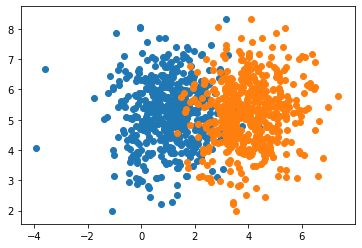

In [100]:
plt.scatter(dist1[:,0], dist2[:,1])
plt.scatter(dist2[:,0], dist2[:,1])
plt.show()

In [101]:
data= np.zeros((1000,3))
data[:500, :2]=dist1
data[500:, :2]=dist2
data[500:, -1]=1
print(data.shape)

(1000, 3)


In [102]:
np.random.shuffle(data)
data[:10]

array([[0.57375089, 4.56240398, 0.        ],
       [1.12849051, 4.84729876, 0.        ],
       [0.81452106, 4.83269835, 0.        ],
       [4.11967319, 6.68878932, 1.        ],
       [1.973647  , 5.64984367, 0.        ],
       [0.80657628, 3.29056104, 0.        ],
       [0.75789556, 5.26221408, 0.        ],
       [0.60038341, 5.46620652, 0.        ],
       [1.0968453 , 4.86815395, 0.        ],
       [0.70545631, 4.77124696, 0.        ]])

In [103]:
split=int(0.7*1000)
X_train=data[:split, :2]
X_test= data[split:, :2]

y_train=data[:split, -1]
y_test=data[split :,-1]

In [104]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(700, 2) (700,)
(300, 2) (300,)


In [105]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

In [106]:
def hypothesis(X,W,b):
    h=(X*W).sum()+b
    return sigmoid(h)

In [107]:
#Binary Cross-Entropy
def log_likelihood(X, W, y_true, b):
    
    total=0.0
    m=X.shape[0]
    for i in range(m):
        if y_true[i] == 0:
            total += np.log(1-hypothesis(X[i],W,b))
        else:
            total += np.log(hypothesis(X[i],W,b))
    total /=m
    return total

In [108]:
def gradirent_ascent(X,W,b,y_true,learning_rate=0.1):
    
    gradW=np.zeros(2)
    gradB=0.0    
    m=X.shape[0]    
    for i in range(m):
        gradW += (y_true[i]-hypothesis(X[i],W,b))*(X[i])
        gradB += (y_true[i]-hypothesis(X[i],W,b))
    
    gradW /=m
    gradB /=m
    
    W+=learning_rate*gradW
    b+=learning_rate*gradB
    
    log_like=log_likelihood(X,W,y_true,b)
    return W,b,log_like

In [109]:
W = np.array([0.5,0.5])
b = 4.2
log_likes=[]
for i in range(400):
    W,b,logs=gradirent_ascent(X_train,W,b,y_train,learning_rate=0.1)
    log_likes.append(logs)
    
print(b)
print(W)
    

2.5751130142615204
[ 2.47979009 -1.62793111]


-0.27010681285263083


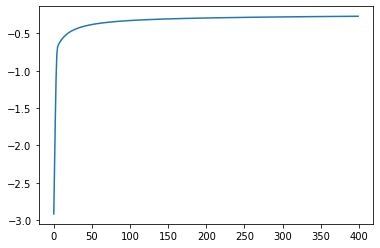

In [110]:
print(log_likes[-1])
plt.plot(log_likes)
plt.show()

In [111]:
def predict(x_sample,W,b):
    
    conf = hypothesis(x_sample, W, b)
    
    if conf >0.5:
        return 1
    else:
        return 0

In [112]:
def score(X_test,y_test,W,b):
    preds=[]
    m=X_test.shape[0]
    for i in range(m):
        p=predict(X_test[i],W,b)
        preds.append(p)
    preds=np.asarray(preds)
    
    return 100* (preds==y_test).sum() /m

In [113]:
score(X_test,y_test,W,b)

88.0

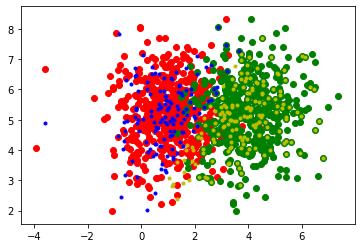

In [114]:
plt.scatter(dist1[:,0], dist2[:,1], color='r')
plt.scatter(dist2[:,0], dist2[:,1], color='g')

m=X_test.shape[0]

for i in range(m):
    x=X_test[i]
    p=predict(x,W,b)
    if p==0:
        plt.plot(x[0],x[1],'b.')
    else:
        plt.plot(x[0],x[1],'y.')
plt.show()
